# Fake News Analysis with Decision Tree

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
import string

### Data Preprocessing

In [100]:
true = pd.read_csv('FakeNewsDataset/True.csv')
fake = pd.read_csv('FakeNewsDataset/Fake.csv')

true['prediction'] = 1
fake['prediction'] = 0

In [101]:
# A lot true news has a common pattern: at the beggining of the text there is the source of the news(Reuters in our case)

In [102]:
true.head()

,title,text,subject,date,prediction
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [103]:
# Removing the source pattern in the text column

In [104]:
news_collection = []
for row in true.text:
    try:
        news = row.split(" -", maxsplit=1)[1]
        news_collection.append(news)
    except:
        news_collection.append(row)

true['text'] = news_collection
true.head(10)

,title,text,subject,date,prediction
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fi...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links be...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos to...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Pos...,politicsNews,"December 29, 2017",1
5,"White House, Congress prepare for talks on spe...",The White House said on Friday it was set to ...,politicsNews,"December 29, 2017",1
6,"Trump says Russia probe will be fair, but time...",President Donald Trump said on Thursday he be...,politicsNews,"December 29, 2017",1
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,While the Fake News loves to talk about my so...,politicsNews,"December 29, 2017",1
8,Trump on Twitter (Dec 28) - Global Warming,"Together, we are MAKING AMERICA GREAT AGAIN! ...",politicsNews,"December 29, 2017",1
9,Alabama official to certify Senator-elect Jone...,Alabama Secretary of State John Merrill said ...,politicsNews,"December 28, 2017",1


In [105]:
# All the fake news doesn't have a source

In [106]:
fake.head()

,title,text,subject,date,prediction
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [107]:
data = pd.concat([true,fake])

In [108]:
# Shuffling of the data

In [109]:
data = shuffle(data).reset_index(drop=True)
data

,title,text,subject,date,prediction
0,LOL! NYC COLLEGE Tells NYPD To Use Bathroom At...,Brooklyn College is advising New York City pol...,politics,"Nov 21, 2017",0
1,#YouveBeenTrumped…Journalist Who Tried To Nail...,This is the dumbest and biggest crime in the h...,politics,"Jul 11, 2017",0
2,Somalia hands over ONLF rebel leader to Ethiop...,Somali authorities have handed over to Ethiop...,worldnews,"August 31, 2017",1
3,Deadline looms for South Africa's Zuma over re...,Lawyers for Jacob Zuma have until midnight to...,worldnews,"November 30, 2017",1
4,France calls for rapid resolution in case of j...,France s foreign minister called on Thursday ...,worldnews,"September 14, 2017",1
...,...,...,...,...,...
44893,FOUR-TIME DEPORTED ILLEGAL ALIEN Gang Member S...,Nassau County cops busted a Long Island man wh...,left-news,"Mar 23, 2017",0
44894,President Mugabe stuns Zimbabwe by defying pre...,President Robert Mugabe stunned Zimbabwe on S...,worldnews,"November 19, 2017",1
44895,Tavis Smiley Drops A Truth Bomb About Obama An...,Tavis Smiley was on Megyn Kelly and was asked ...,politics,"Jan 12, 2016",0
44896,"'You're wrong', Tillerson says of reports he w...",U.S. Secretary of State Rex Tillerson said th...,politicsNews,"December 6, 2017",1


In [110]:
data['text'] = data['title'] + ' ' + data['text']
data = data.drop(columns = ['title','subject','date'])

In [111]:
def clean_text(text):

    # Remove punctuation
    translator1 = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    text = text.translate(translator1)
    
    # Convert to lowercase characters
    text = text.lower()
         
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in STOPWORDS])
    
    return text

In [112]:
data['text'] = data['text'].apply(clean_text)

data.head()

,text,prediction
0,lol nyc college tells nypd use bathroom far en...,0
1,youvebeentrumped…journalist tried nail donald ...,0
2,somalia hands onlf rebel leader ethiopia group...,1
3,deadline looms south africa zuma revived graft...,1
4,france calls rapid resolution case journalist ...,1


### Plotting of the prediction column

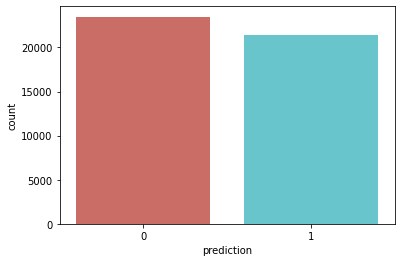

In [113]:
sns.countplot(x='prediction',data=data,palette='hls')

In [114]:
train, test = train_test_split(data, test_size = 0.3, random_state = 7)

### TfidTransformer

In [115]:
# fit() : used for generating learning model parameters from training data
# transform() : parameters generated from fit() method,applied upon model to generate transformed data set.

In [116]:
# It takes the 30000 top words
vectorized = TfidfVectorizer(max_features = 30000)

train_reviews=vectorized.fit_transform(train.text)
test_reviews=vectorized.transform(test.text)

### Decision Tree

In [117]:
# default=”gini”
clf = DecisionTreeClassifier()
clf.fit(train_reviews, train.prediction)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [118]:
ans = clf.predict(test_reviews)

In [119]:
accuracy_score(ans, test.prediction)

0.9661469933184855

In [120]:
confusion_matrix(test.prediction.tolist(), ans.tolist())

array([[6835,  189],
       [ 267, 6179]])

In [121]:
print(classification_report(test.prediction, ans))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      7024
           1       0.97      0.96      0.96      6446

    accuracy                           0.97     13470
   macro avg       0.97      0.97      0.97     13470
weighted avg       0.97      0.97      0.97     13470

